# Predictive model for subscribers

In this machine learning project, I'm going to predict the subscribers number of a given channel based on the informations passed

In [108]:
!pip3 install scikit-learn

In [109]:
import pandas as pd
import numpy as np

# Loading the CSV

In [110]:
df = pd.read_csv(r'../dataset/Global YouTube Statistics.csv', encoding='latin1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# Cheking for empty values

In [111]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [112]:
for column in df.columns:
    print(column, df[column].isnull().values.any())

rank False
Youtuber False
subscribers False
video views False
category True
Title False
uploads False
Country True
Abbreviation True
channel_type True
video_views_rank True
country_rank True
channel_type_rank True
video_views_for_the_last_30_days True
lowest_monthly_earnings False
highest_monthly_earnings False
lowest_yearly_earnings False
highest_yearly_earnings False
subscribers_for_last_30_days True
created_year True
created_month True
created_date True
Gross tertiary education enrollment (%) True
Population True
Unemployment rate True
Urban_population True
Latitude True
Longitude True


In [113]:
df[df.isna().any(axis=1)]

for column in df.columns:
    print(column, df[column].isnull().sum())

rank 0
Youtuber 0
subscribers 0
video views 0
category 46
Title 0
uploads 0
Country 122
Abbreviation 122
channel_type 30
video_views_rank 1
country_rank 116
channel_type_rank 33
video_views_for_the_last_30_days 56
lowest_monthly_earnings 0
highest_monthly_earnings 0
lowest_yearly_earnings 0
highest_yearly_earnings 0
subscribers_for_last_30_days 337
created_year 5
created_month 5
created_date 5
Gross tertiary education enrollment (%) 123
Population 123
Unemployment rate 123
Urban_population 123
Latitude 123
Longitude 123


# Data cleaning

For the most part, the majority of empty values are related to country, its population and data related to the channel.

In [114]:
columns = ['Country', 'category', 'channel_type']
for column in columns:
    df[column].fillna('Unknow', inplace=True)
df['Abbreviation'].fillna('UN', inplace=True)

In [115]:
df.drop(['rank', 'created_year', 'created_month', 'created_date', 'Latitude', 'Longitude', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population'], axis=1, inplace=True)

In [116]:
df['video_views_rank'].dropna(inplace=True)
df['video_views_rank'].fillna(0, inplace=True)

In [117]:
df.drop(columns=['Youtuber', 'Title', 'Abbreviation'], axis=1, inplace=True)
df.head()

,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
0,245000000,2.280000e+11,Music,20082,India,Music,1.0,564600.0,9000000.00,6800000.00,1.084000e+08
1,170000000,0.000000e+00,Film & Animation,1,United States,Games,4055159.0,0.0,0.05,0.04,5.800000e-01
2,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,337000.0,5400000.00,4000000.00,6.470000e+07
3,162000000,1.640000e+11,Education,966,United States,Education,2.0,493800.0,7900000.00,5900000.00,9.480000e+07
4,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,455900.0,7300000.00,5500000.00,8.750000e+07


In [118]:
df = df.dropna(axis=1, thresh=10)

df[df.isna().any(axis=1)]

for column in df.columns:
    print(column, df[column].isnull().sum())

subscribers 0
video views 0
category 0
uploads 0
Country 0
channel_type 0
video_views_rank 0
lowest_monthly_earnings 0
highest_monthly_earnings 0
lowest_yearly_earnings 0
highest_yearly_earnings 0


Disclaimer: I was having trouble with the categorical columns in the input data. I was not able to cleverly preprocess the data again and did not think of a different process to do so without passing it again trought the notebook, so I just will ignore them for the time.

In [119]:
categorical_columns = ['Country', 'category', 'channel_type']
df.drop(columns=categorical_columns, axis=1, inplace=True)

# df_encoded = pd.get_dummies(df, columns=categorical_columns)

# df_encoded.head()

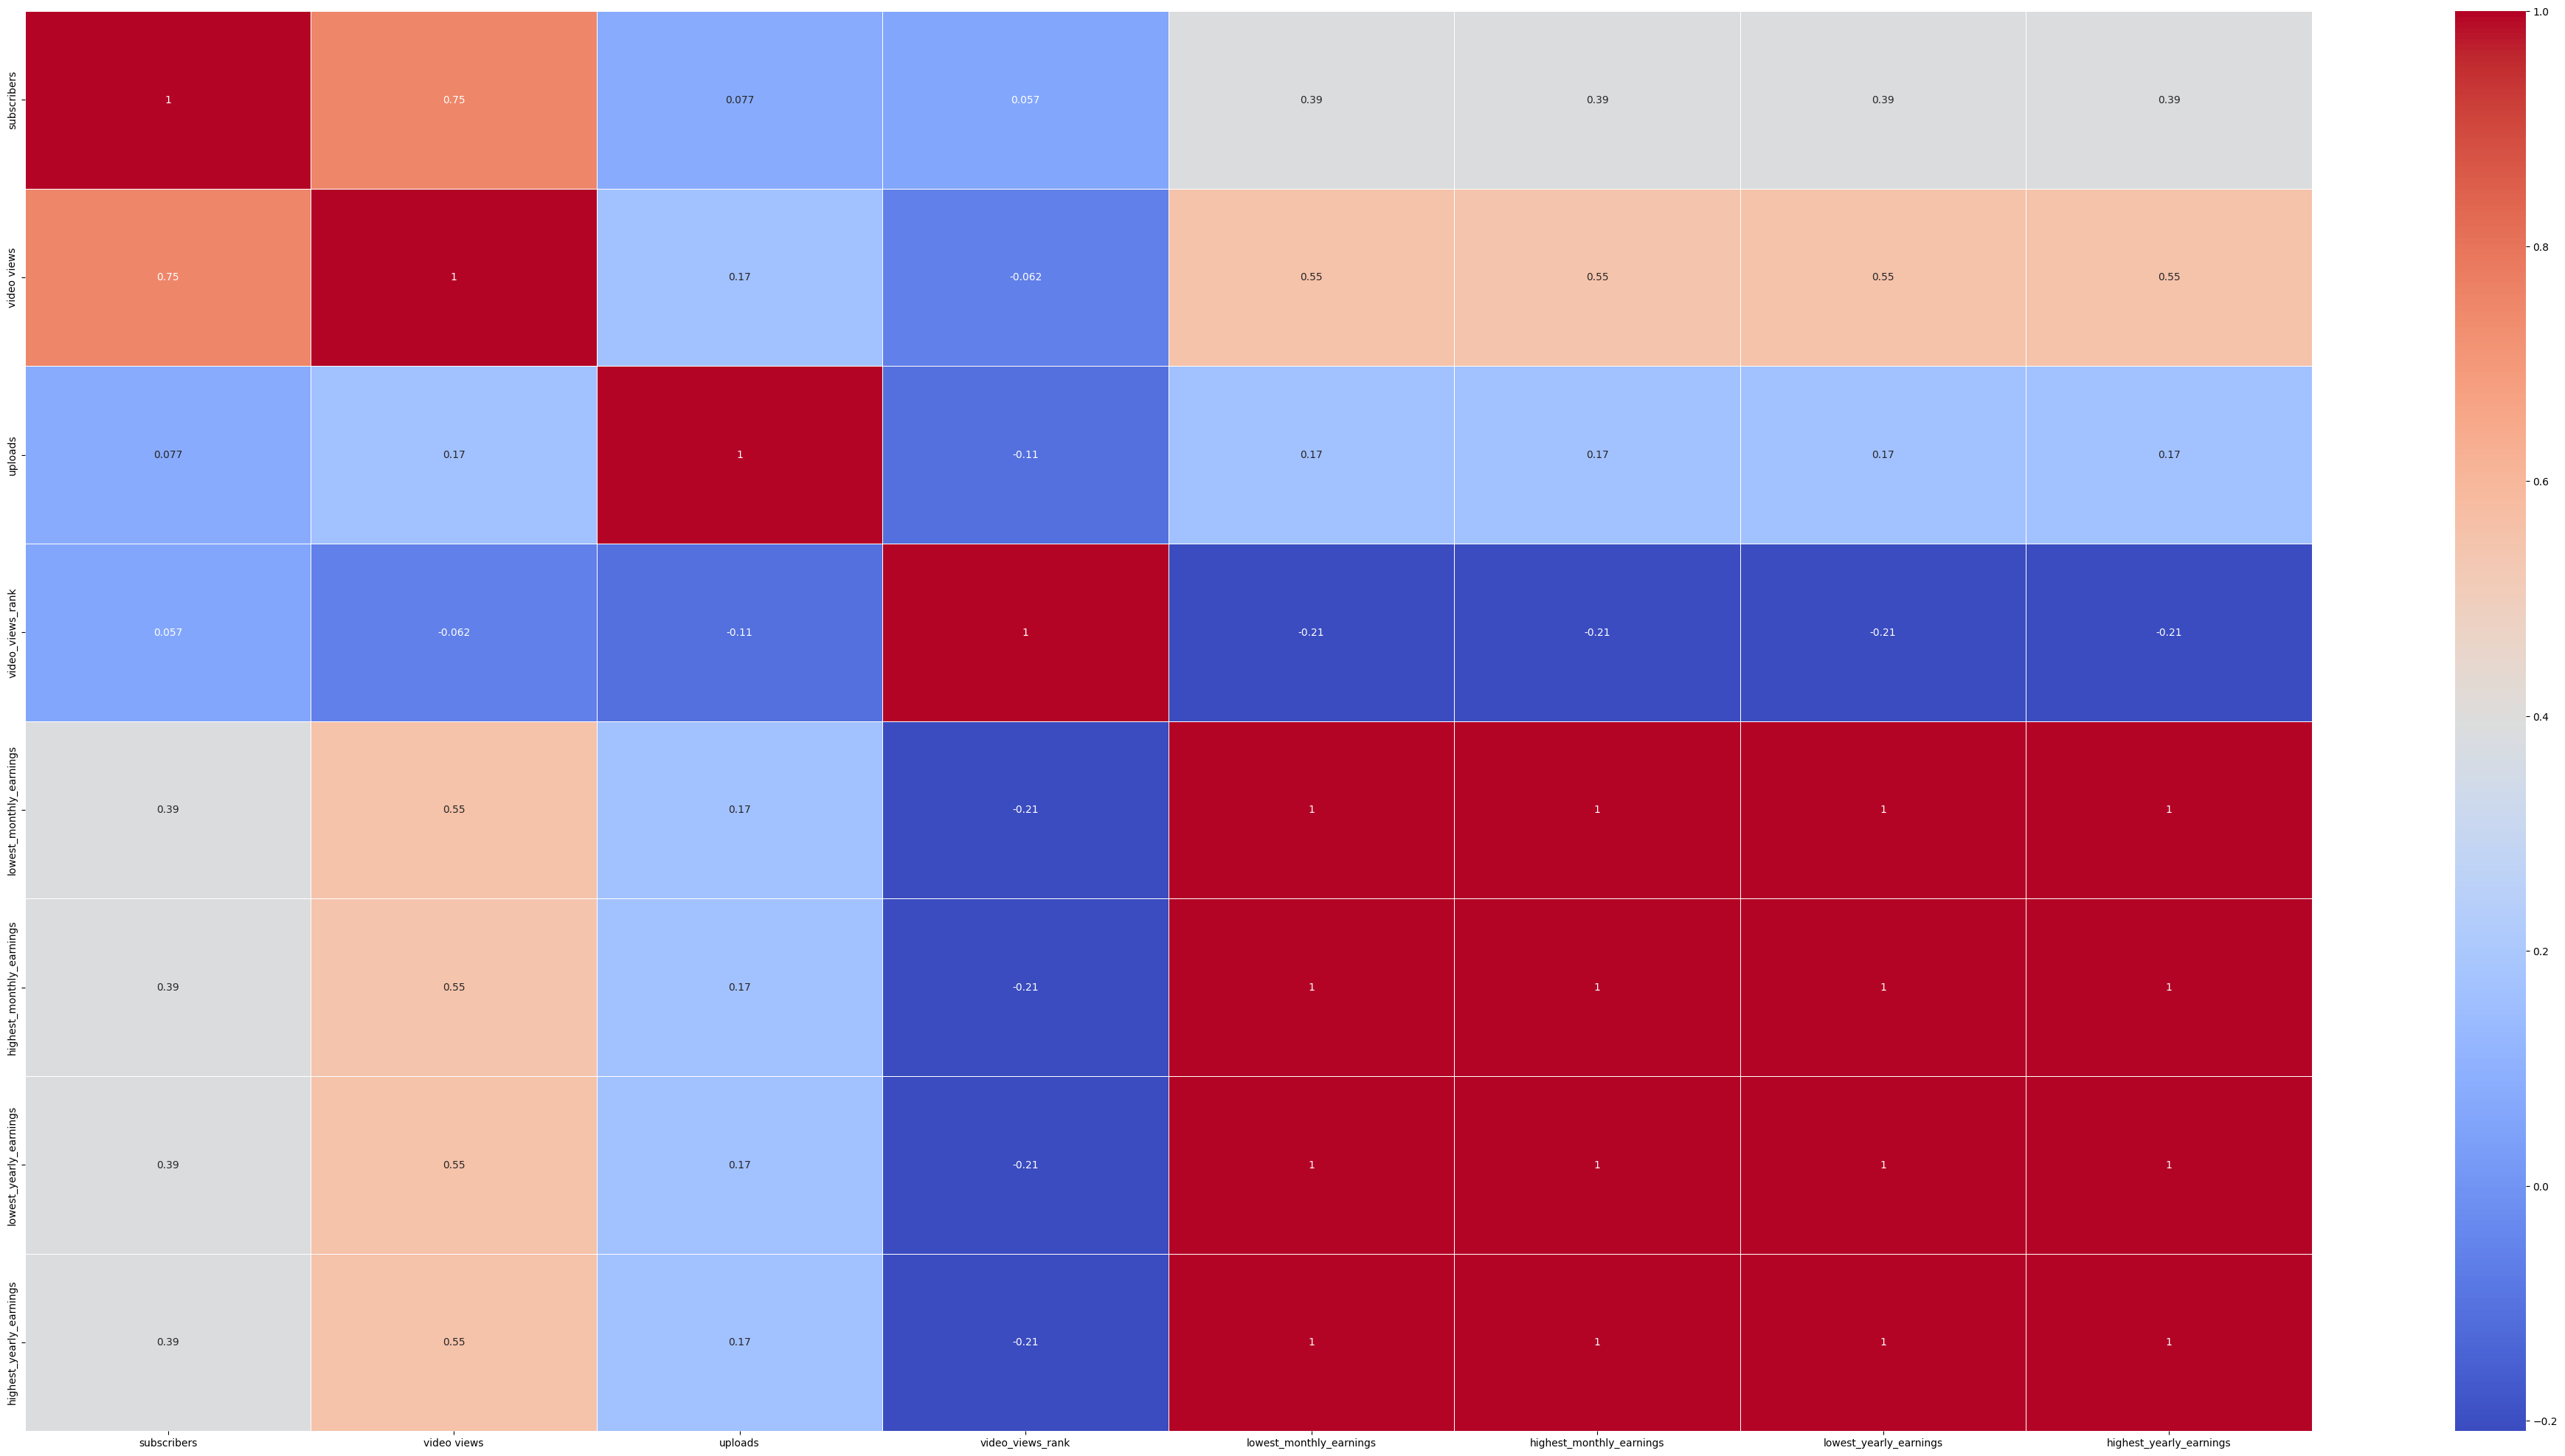

In [120]:
matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 25))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [121]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['video views'])  # Features
y = df['video views']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

Linear regression is one of the simplest and most interpretable machine learning models. It's easy to understand and implement, making it an excellent choice for us. (Especially because I hate data analysis and don't want to go any further than this... Sorry Murilo 😅)

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

model.score(X_test, y_test)


Mean Squared Error: 4.289159831371687e+19


0.5816344307565644

In [123]:
# creating a pickle file for the classifier

import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))